# Pandas Essentials:  Data Wrangling

This Pandas Notebook illustrates the essentials of "wrangling" your data.  Concepts are illustrated with the [New York City pizza restaurant inspection data](https://github.com/ecerami/pydata-essentials/blob/master/pandas/data/NYC_Pizza_2017.csv).

Topics include:

* Transforming Datatypes of Columns
* Dropping Columns
* Renaming Columns
* Merging Data Frames

In [1]:
import pandas as pd

In [2]:
# Read in the Full Pizza Data Set
pizza_df = pd.read_csv("data/NYC_Pizza_2017_Full.csv")

# Transforming Datatypes of Columns

In [3]:
# Before any transformation, these are our data types
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19818 entries, 0 to 19817
Data columns (total 16 columns):
CAMIS                  19818 non-null int64
DBA                    19818 non-null object
BORO                   19818 non-null object
BUILDING               19818 non-null object
STREET                 19818 non-null object
ZIPCODE                19818 non-null float64
PHONE                  19818 non-null int64
CUISINE DESCRIPTION    19818 non-null object
INSPECTION DATE        19818 non-null object
ACTION                 19818 non-null object
VIOLATION CODE         19559 non-null object
SCORE                  18626 non-null float64
GRADE                  9631 non-null object
GRADE DATE             9575 non-null object
RECORD DATE            19818 non-null object
INSPECTION TYPE        19818 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 2.4+ MB


In [4]:
# Let's Transform Some columns to strings
# and dates to datetime objects
pizza_df["CAMIS"] = pizza_df.CAMIS.astype(str)
pizza_df["ZIPCODE"] = pizza_df.ZIPCODE.astype(int).astype(str)
pizza_df["GRADE DATE"] = pd.to_datetime(pizza_df["GRADE DATE"])
pizza_df["RECORD DATE"] = pd.to_datetime(pizza_df["RECORD DATE"])
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19818 entries, 0 to 19817
Data columns (total 16 columns):
CAMIS                  19818 non-null object
DBA                    19818 non-null object
BORO                   19818 non-null object
BUILDING               19818 non-null object
STREET                 19818 non-null object
ZIPCODE                19818 non-null object
PHONE                  19818 non-null int64
CUISINE DESCRIPTION    19818 non-null object
INSPECTION DATE        19818 non-null object
ACTION                 19818 non-null object
VIOLATION CODE         19559 non-null object
SCORE                  18626 non-null float64
GRADE                  9631 non-null object
GRADE DATE             9575 non-null datetime64[ns]
RECORD DATE            19818 non-null datetime64[ns]
INSPECTION TYPE        19818 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(12)
memory usage: 2.4+ MB


# Dropping Columns

In [5]:
pizza_df.drop(labels="PHONE", axis="columns", inplace=True)
pizza_df.drop(labels="BUILDING", axis="columns", inplace=True)
pizza_df.drop(labels="STREET", axis="columns", inplace=True)
pizza_df.drop(labels="CUISINE DESCRIPTION", axis="columns", inplace=True)
pizza_df.info()

# Note:  you can also drop rows via the same mechanism, except specify axis="index"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19818 entries, 0 to 19817
Data columns (total 12 columns):
CAMIS              19818 non-null object
DBA                19818 non-null object
BORO               19818 non-null object
ZIPCODE            19818 non-null object
INSPECTION DATE    19818 non-null object
ACTION             19818 non-null object
VIOLATION CODE     19559 non-null object
SCORE              18626 non-null float64
GRADE              9631 non-null object
GRADE DATE         9575 non-null datetime64[ns]
RECORD DATE        19818 non-null datetime64[ns]
INSPECTION TYPE    19818 non-null object
dtypes: datetime64[ns](2), float64(1), object(9)
memory usage: 1.8+ MB


# Renaming columns

In [6]:
pizza_df.rename(columns = {'CAMIS':'ID'}, inplace=True)
pizza_df.rename(columns = {'DBA':'NAME'}, inplace=True)
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19818 entries, 0 to 19817
Data columns (total 12 columns):
ID                 19818 non-null object
NAME               19818 non-null object
BORO               19818 non-null object
ZIPCODE            19818 non-null object
INSPECTION DATE    19818 non-null object
ACTION             19818 non-null object
VIOLATION CODE     19559 non-null object
SCORE              18626 non-null float64
GRADE              9631 non-null object
GRADE DATE         9575 non-null datetime64[ns]
RECORD DATE        19818 non-null datetime64[ns]
INSPECTION TYPE    19818 non-null object
dtypes: datetime64[ns](2), float64(1), object(9)
memory usage: 1.8+ MB


# Merging

In [7]:
# Read in Violation Code Descriptions
violation_codes = pd.read_csv("data/violation_codes.csv")
violation_codes.head()

,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG
0,02B,Hot food item not held at or above 140 F.,Critical
1,06D,"Food contact surface not properly washed, rins...",Critical
2,02G,Cold food item held above 41 F (smoked fish an...,Critical
3,10B,Plumbing not properly installed or maintained;...,Not Critical
4,15L,Smoke free workplace smoking policy inadequate...,Not Critical


In [8]:
# Create a small data frame with three code
sample_codes = ["02B", "06D", "99D"]
sample_df = pd.DataFrame(sample_codes, columns=["VIOLATION CODE"])

In [9]:
# Illustrate a "left" merge
pd.merge(left=sample_df, right=violation_codes, how="left")

,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG
0,02B,Hot food item not held at or above 140 F.,Critical
1,06D,"Food contact surface not properly washed, rins...",Critical
2,99D,NaN,NaN


In [10]:
# Illustrate an "inner" merge
pd.merge(left=sample_df, right=violation_codes, how="inner")

,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG
0,02B,Hot food item not held at or above 140 F.,Critical
1,06D,"Food contact surface not properly washed, rins...",Critical


In [11]:
# Merge pizza_df with violation_codes
pizza_merged_df = pd.merge(left=pizza_df, right=violation_codes, 
    how="left", on="VIOLATION CODE")

In [12]:
pizza_merged_df.head()

,ID,NAME,BORO,ZIPCODE,INSPECTION DATE,ACTION,VIOLATION CODE,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,VIOLATION DESCRIPTION,CRITICAL FLAG
0,41652560,$1 PIZZA $2 BEER,MANHATTAN,10012,05/04/2015,Violations were cited in the following area(s).,02B,19.0,NaN,NaT,2017-04-22,Cycle Inspection / Initial Inspection,Hot food item not held at or above 140 F.,Critical
1,41257734,PAPA JOHN'S,QUEENS,11433,04/04/2017,Establishment re-closed by DOHMH,08A,12.0,NaN,NaT,2017-04-22,Cycle Inspection / Reopening Inspection,Facility not vermin proof. Harborage or condit...,Not Critical
2,40933080,LUIGI'S PIZZA,QUEENS,11416,12/20/2016,Violations were cited in the following area(s).,06D,5.0,A,2016-12-20,2017-04-22,Cycle Inspection / Re-inspection,"Food contact surface not properly washed, rins...",Critical
3,41656246,NEW MARIOS PIZZERIA,BROOKLYN,11238,03/06/2017,Violations were cited in the following area(s).,10F,14.0,NaN,NaT,2017-04-22,Cycle Inspection / Initial Inspection,Non-food contact surface improperly constructe...,Not Critical
4,41353218,CASSIANO'S PIZZA,MANHATTAN,10022,10/06/2015,Violations were cited in the following area(s).,04M,12.0,A,2015-10-06,2017-04-22,Cycle Inspection / Re-inspection,Live roaches present in facility's food and/or...,Critical


# Deep Dive on One Specific Restaurant

In [13]:
# Example violations from one specific restaurant
aj_pizza = pizza_merged_df[pizza_merged_df["ID"] == "50019036"]
scores = aj_pizza.groupby("GRADE DATE").SCORE.max()
scores

GRADE DATE
2015-03-05    10.0
2015-11-09    12.0
2016-06-23    12.0
2017-01-23    42.0
Name: SCORE, dtype: float64

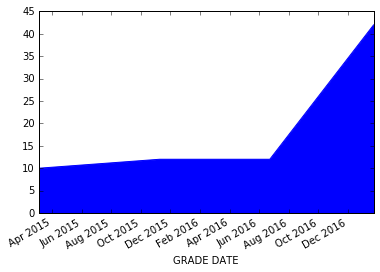

In [14]:
%matplotlib inline
scores.plot.area();

In [15]:
recent = aj_pizza[aj_pizza["GRADE DATE"] == "2017-01-23"]
for index, row in recent.iterrows():
    print "[%s]:  %s" % (row["VIOLATION CODE"], row["VIOLATION DESCRIPTION"])

[02G]:  Cold food item held above 41 F (smoked fish and reduced oxygen packaged foods above 38 F) except during necessary preparation.
[04N]:  Filth flies or food/refuse/sewage-associated (FRSA) flies present in facilitys food and/or non-food areas. Filth flies include house flies, little house flies, blow flies, bottle flies and flesh flies. Food/refuse/sewage-associated flies include fruit flies, drain flies and Phorid flies.
[10H]:  Proper sanitization not provided for utensil ware washing operation.
[08A]:  Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.
